In [156]:
import sys
!{sys.executable} -m pip install google_images_download pytesseract opencv-python

  Could not find a version that satisfies the requirement resizeimage (from versions: )
No matching distribution found for resizeimage


In [231]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

def get_image(kw): 
    arguments = {"keywords": kw, "limit": 1}
    absolute_image_paths = response.download(arguments)
    return absolute_image_paths

import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract

def grid_display(list_of_images, list_of_titles=[], no_of_columns=4, figsize=(20,3)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        
        
        
        img = cv.imread(list_of_images[i])
        rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        plt.imshow(rgb_img)
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))            
            
import requests, json

def random_user_reccom():
    url = 'http://docker.for.mac.localhost:8080/user/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
    
    printmd('**Recommendations for user {}:**'.format(data.get("id")))
    grid_display(image_links, titles) 


from IPython.core.display import Image, display
def random_item_reccom():
    url = 'http://docker.for.mac.localhost:8080/item/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
        item_url = next(iter(next(iter(get_image(data.get("movie")).values()))))
        display(Image(item_url, width=100, unconfined=True))
    
    printmd('**Recommendations for {}:**'.format(data.get("movie")))
    grid_display(image_links, titles) 


**Response:**

{
    "id": 334,
    "scores": [
        {
            "id": 318,
            "score": 1.1876604557037354,
            "title": "Shawshank Redemption, The (1994)"
        },
        {
            "id": 5952,
            "score": 1.132552146911621,
            "title": "Lord of the Rings: The Two Towers, The (2002)"
        },
        {
            "id": 4993,
            "score": 1.1269381046295166,
            "title": "Lord of the Rings: The Fellowship of the Ring, The (2001)"
        },
        {
            "id": 2571,
            "score": 1.1268022060394287,
            "title": "Matrix, The (1999)"
        },
        {
            "id": 7153,
            "score": 1.1216797828674316,
            "title": "Lord of the Rings: The Return of the King, The (2003)"
        },
        {
            "id": 356,
            "score": 1.1152340173721313,
            "title": "Forrest Gump (1994)"
        },
        {
            "id": 296,
            "score": 1.0900708436965942,
            

**Recommendations for user 334:**

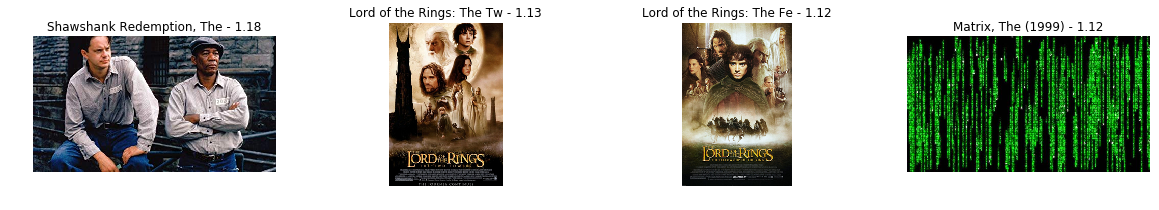

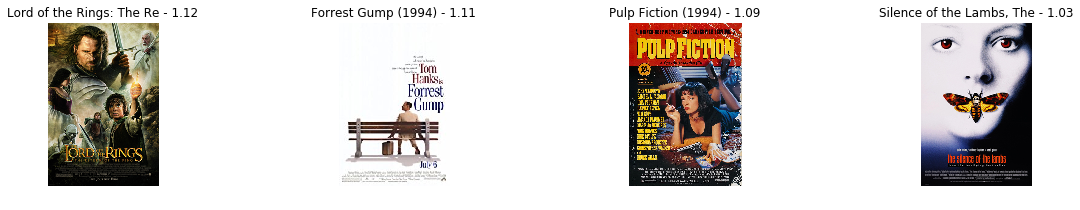

In [230]:
random_user_reccom()

**Response:**

{
    "id": 166528,
    "movie": "Rogue One: A Star Wars Story (2016)",
    "scores": [
        {
            "id": 89745,
            "score": 0.3747270703315735,
            "title": "Avengers, The (2012)"
        },
        {
            "id": 112852,
            "score": 0.36823898553848267,
            "title": "Guardians of the Galaxy (2014)"
        },
        {
            "id": 77561,
            "score": 0.35736721754074097,
            "title": "Iron Man 2 (2010)"
        },
        {
            "id": 111759,
            "score": 0.345424622297287,
            "title": "Edge of Tomorrow (2014)"
        },
        {
            "id": 115617,
            "score": 0.3424430787563324,
            "title": "Big Hero 6 (2014)"
        },
        {
            "id": 122904,
            "score": 0.33897191286087036,
            "title": "Deadpool (2016)"
        },
        {
            "id": 102125,
            "score": 0.33715391159057617,
            "title": "Iron Man 3 (2013)"

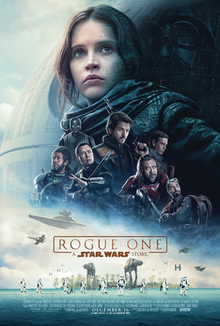

**Recommendations for Rogue One: A Star Wars Story (2016):**

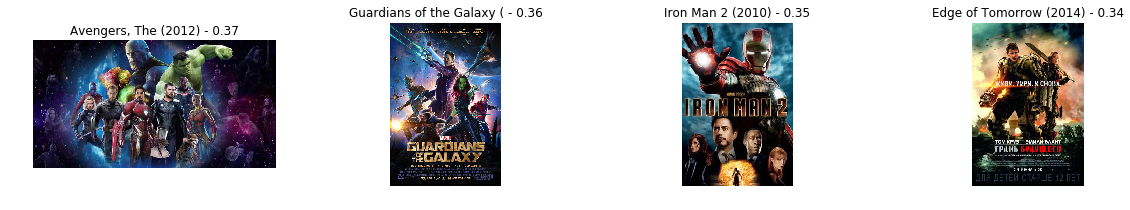

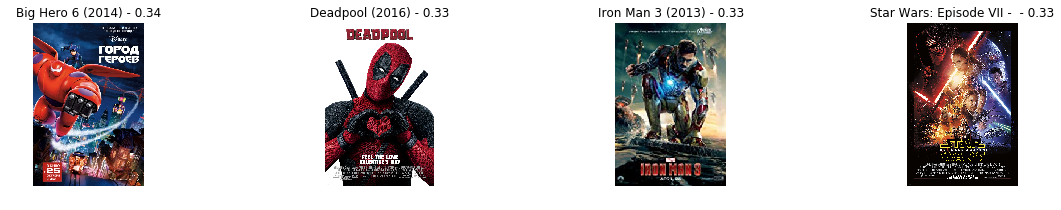

In [236]:
random_item_reccom()